In [191]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1. Imported Listings and converted Price column

In [286]:
df_listings2 = pd.read_csv('/Users/stephaniechew/Japan_Airbnb/listings.csv.gz')

df_listings2['price'] = df_listings2['price'].str.replace(',','')
df_listings2['price'] = df_listings2['price'].str.replace('$','').astype(float).astype(int)

df_listings2.info(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 106 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   id                                            int64  
 1   listing_url                                   object 
 2   scrape_id                                     int64  
 3   last_scraped                                  object 
 4   name                                          object 
 5   summary                                       object 
 6   space                                         object 
 7   description                                   object 
 8   experiences_offered                           object 
 9   neighborhood_overview                         object 
 10  notes                                         object 
 11  transit                                       object 
 12  access                                        object 
 13  

In [459]:
df_listings2.loc[df_listings2['bedrooms'].max()]

id                                                                                        2839061
listing_url                                                  https://www.airbnb.com/rooms/2839061
scrape_id                                                                          20200530034812
last_scraped                                                                           2020-05-30
name                                            Work desk/Central TKO/Discover local life&culture
                                                                      ...                        
calculated_host_listings_count_entire_homes                                                     0
calculated_host_listings_count_private_rooms                                                    1
calculated_host_listings_count_shared_rooms                                                     0
reviews_per_month                                                                            1.25
US_Price            

## 1a. Dropped NaN in bedrooms column

In [386]:
df_listings2.loc[df_listings2['bedrooms'].isna()]

df_listings2.dropna(subset=['bedrooms'],inplace=True)

## 2. Explored Tokyo Airbnb data

In [387]:
counts_of_nights = df_listings2['minimum_nights'].value_counts()

df_listings2['room_type'].value_counts()

df_listings2['host_name'].value_counts().head(10)

counts_of_neighborhoods = df_listings2['neighbourhood_cleansed'].value_counts()

df_listings2['price'].value_counts()

df_listings2['bedrooms']>3

counts_of_nights.reset_index()
#counts_of_neighborhoods

,index,minimum_nights
0,1,8909
1,2,3811
2,3,774
3,30,689
4,7,134
5,5,129
6,4,128
7,28,74
8,6,71
9,23,54


## 3. Filtered to Shinjuku District and counted minimum nights

In [388]:
grouped1 = df_listings2.groupby(['neighbourhood_cleansed'])['minimum_nights']

grouped1.value_counts().loc['Taito Ku']


minimum_nights
1      1487
2       397
3        89
30       25
4        22
7         7
6         6
5         5
8         2
13        2
14        1
20        1
180       1
Name: minimum_nights, dtype: int64

## 4. What are the top 3 districts in Tokyo, Japan with most Airbnb postings?

In [399]:
top3_districts = df_listings2['neighbourhood_cleansed'].value_counts().head(3).reset_index()
top3_districts

,index,neighbourhood_cleansed
0,Shinjuku Ku,2766
1,Taito Ku,2045
2,Toshima Ku,1543


[Text(0, 0.5, 'Number of Posts'), Text(0.5, 0, 'Three Districts')]

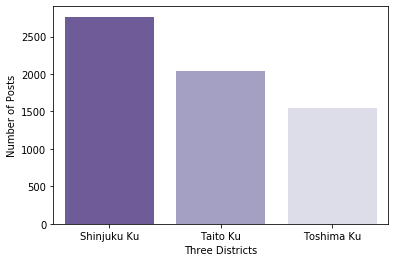

In [398]:
top3_dist_bar = sns.barplot(x='index', y="neighbourhood_cleansed", data=top3_districts, palette='Purples_r')
top3_dist_bar.set(xlabel='Three Districts', ylabel='Number of Posts')

# 5. Average price per room type in Shinjuku, Taito, and Toshima Districts

In [369]:
grouped2b = df_listings2.groupby(['neighbourhood_cleansed', 'room_type'])['price'].mean().round(2)

Shinjuku = grouped2b.loc['Shinjuku Ku'].reset_index()
Shinjuku

,room_type,price
0,Entire home/apt,24294.04
1,Hotel room,10389.41
2,Private room,15418.29
3,Shared room,3348.53


# Converted from Yen to USD and added new column

In [370]:
df_listings2['US_Price'] = df_listings2['price']*0.0095

df_listings2['US_Price'] = df_listings2['US_Price'].round(2)

grouped2c = df_listings2.groupby(['neighbourhood_cleansed', 'room_type'])['US_Price'].mean().round(2)

US_price_Shinjuku = grouped2c.loc['Shinjuku Ku'].reset_index()
US_price_Shinjuku

,room_type,US_Price
0,Entire home/apt,230.79
1,Hotel room,98.70
2,Private room,146.47
3,Shared room,31.81


# Average price per room type in Taito District

In [371]:
#Average price in Yen
Taito = grouped2b.loc['Taito Ku'].reset_index()
Taito

,room_type,price
0,Entire home/apt,42634.09
1,Hotel room,32502.74
2,Private room,13720.48
3,Shared room,6828.48


In [372]:
US_price_Taito = grouped2c.loc['Taito Ku'].reset_index()
US_price_Taito

,room_type,US_Price
0,Entire home/apt,405.02
1,Hotel room,308.78
2,Private room,130.34
3,Shared room,64.87


In [300]:
US_Price_Toshima = grouped2c.loc['Toshima Ku'].reset_index()
US_Price_Toshima

,room_type,US_Price
0,Entire home/apt,355.98
1,Hotel room,77.79
2,Private room,72.05
3,Shared room,29.64


## Average USD price per night, per room type, in top 3 districts

[Text(0, 0.5, 'Average USD Price per Night'), Text(0.5, 0, 'Three Districts')]

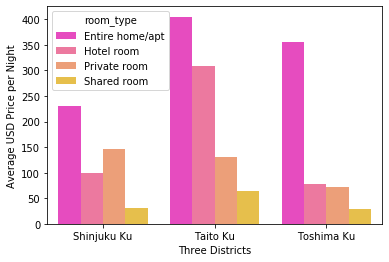

In [400]:
grouped2c = grouped2c.reset_index()
grouped_taito = grouped2c['neighbourhood_cleansed'] == 'Taito Ku'
grouped_shinjuku = grouped2c['neighbourhood_cleansed'] == 'Shinjuku Ku'
grouped_toshima = grouped2c['neighbourhood_cleansed'] == 'Toshima Ku'

grouped_three_districts = grouped2c.loc[grouped_taito | grouped_shinjuku | grouped_toshima]

grouped_three_avg_bar = sns.barplot(x='neighbourhood_cleansed', y='US_Price', hue='room_type', 
            data=grouped_three_districts, palette='spring')

grouped_three_avg_bar.set(xlabel='Three Districts', ylabel='Average USD Price per Night')


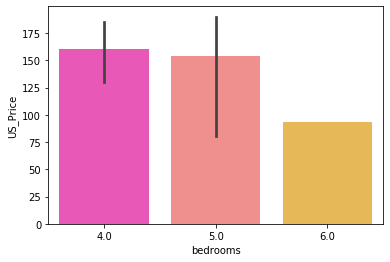

In [352]:
find_bedrooms = df_listings2['bedrooms']>3
taito_only = df_listings2['neighbourhood_cleansed']=='Taito Ku'
prices1 = df_listings2['US_Price'] <=200
find_taito = df_listings2.loc[find_bedrooms & prices1 & taito_only]
sns.barplot(x='bedrooms', y='US_Price', data=find_taito, palette='spring')

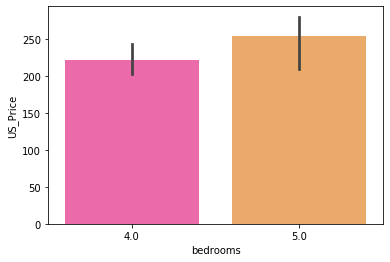

In [353]:
find_bedrooms = df_listings2['bedrooms']>3
shinjuku_only = df_listings2['neighbourhood_cleansed']=='Shinjuku Ku'
prices1 = df_listings2['US_Price'] <=300
find_shinjuku = df_listings2.loc[find_bedrooms & prices1 & shinjuku_only]
sns.barplot(x='bedrooms', y='US_Price', data=find_shinjuku, palette='spring')

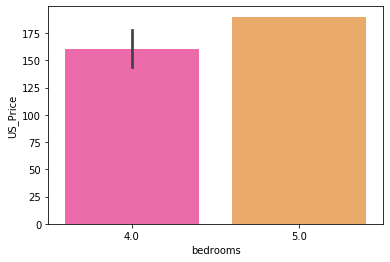

In [354]:
find_bedrooms = df_listings2['bedrooms']>3
toshima_only = df_listings2['neighbourhood_cleansed']=='Toshima Ku'
prices1 = df_listings2['US_Price'] <=200
find_toshima = df_listings2.loc[find_bedrooms & prices1 & toshima_only]
sns.barplot(x='bedrooms', y='US_Price', data=find_toshima, palette='spring')

In [452]:
find_bedrooms.to_csv('find_bedrooms.csv',sep=',')

## Created visualization on 4 or more bedrooms, cost less than 300 USD, and within 3 districts

[Text(0, 0.5, 'Average USD Price per Night'),
 Text(0.5, 0, 'Number of Bedrooms')]

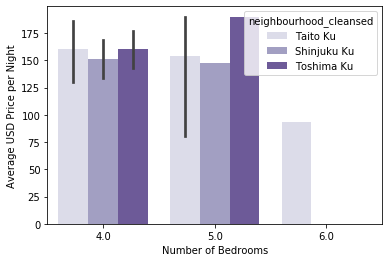

In [404]:
three_districts_only = df_listings2.loc[find_bedrooms & prices1 & (toshima_only|shinjuku_only|taito_only)]

three_districts_bar = sns.barplot(x='bedrooms', y='US_Price', hue='neighbourhood_cleansed', 
                                  data=three_districts_only, palette='Purples')

three_districts_bar.set(xlabel='Number of Bedrooms', ylabel='Average USD Price per Night')


## 6 bedroom apartment in Taito District

In [499]:
find_taito.loc[find_taito['bedrooms'] >= 5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,US_Price
1656,18691692,https://www.airbnb.com/rooms/18691692,20200530034812,2020-05-30,Asakusa 15people The best location for sightse...,In 2019 we hired an architect to renovate a tr...,It can accommodate up to 15 people.,In 2019 we hired an architect to renovate a tr...,none,Sensoji Temple 6min Asakusa Hanayashiki 5min G...,...,f,strict_14_with_grace_period,f,f,2,2,0,0,0.72,92.93
7075,32776518,https://www.airbnb.com/rooms/32776518,20200530034812,2020-05-30,"(101) 3 mins to Station, near by Ueno and Asakusa",Only 3 minutes to walk to Minowa station of To...,There is a car park nearby the building. It i...,Only 3 minutes to walk to Minowa station of To...,none,"本民宿座落在上野,浅草区域的三之轮居民住宅区｡ 关于上野,浅草我就不做说明了,小伙伴们都知道...",...,f,moderate,f,f,4,4,0,0,3.06,189.95
10369,38648746,https://www.airbnb.com/rooms/38648746,20200530034812,2020-05-30,★10min Walk Akihabara Big Apt up to 10 People★,If you are searching the apt with the followin...,It is a huge Akihabara apt with - Living Dinin...,If you are searching the apt with the followin...,none,"Akihabara, the otaku capital of Japan, is a gr...",...,f,strict_14_with_grace_period,f,f,10,9,0,1,1.49,189.95
13498,42105132,https://www.airbnb.com/rooms/42105132,20200530034812,2020-05-30,Asakusa Huge Private House UP to 14ppl.,Perfect location in Asakusa area. Asakusa Sta....,【 About the room 】 ･80㎡ ･Internet / WiFi route...,Perfect location in Asakusa area. Asakusa Sta....,none,NaN,...,f,strict_14_with_grace_period,f,f,1,1,0,0,0.42,80.67


## Dropped columns and created copy of data for visualizations 

In [492]:
df_listings2_copy = df_listings2.drop(['summary','description', 'experiences_offered', 'notes', 'transit', 'access', 
                   'thumbnail_url', 'house_rules', 'medium_url', 'picture_url', 'interaction', 'xl_picture_url',
                  'host_url', "scrape_id", 'last_scraped','require_guest_profile_picture', 'host_about',
                  'host_response_time', 'host_response_rate', 'host_acceptance_rate','neighborhood_overview'
                  , 'space', 'host_thumbnail_url', 'host_picture_url', 'is_business_travel_ready', 'instant_bookable',
                  'license', 'jurisdiction_names', 'requires_license', 'review_scores_location', 'review_scores_communication', 'cancellation_policy',
                  'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_rating', 'review_scores_accuracy', 'require_guest_phone_verification',
                  'number_of_reviews_ltm', 'reviews_per_month', 'host_is_superhost', 'calendar_last_scraped',
                  'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic','host_identity_verified', 'is_location_exact',
                  'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                  'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','calendar_updated','accommodates', 'first_review', 'last_review',
                  'neighbourhood_group_cleansed', 'host_listings_count', 'host_verifications', 'interaction',
                  'house_rules', 'thumbnail_url', 'medium_url'], axis=1)
df_listings2_copy.drop(['square_feet', 'weekly_price', 'monthly_price'], axis=1, inplace=True)
df_listings2_copy.shape

#df_listings2_copy.to_csv('listings_copy.csv')

(14986, 46)

In [489]:
df_listings2_copy['bedrooms'].idxmax()
df_listings2_copy.loc[1483]
# df_listings2_copy.drop(index=1482, inplace=True)

id                                                                                       17600537
listing_url                                                 https://www.airbnb.com/rooms/17600537
name                                             お1人様~専用個室｡日暮里駅至近! Tokyo Guest House 2020-Opening
host_id                                                                                  12014384
host_name                                                                                 Niiyama
host_since                                                                             2014-02-07
host_location                                   2 Chome 33-14, Higashi-ogu, Arakawaku, Tokyo, ...
host_neighbourhood                                                               Arakawa District
host_total_listings_count                                                                      17
street                                                                            荒川区, 東京都, Japan
neighbourhood       